# Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


# Load Dataset

In [14]:

file_path = "dataset.csv" 

data = pd.read_csv(file_path)

pd.set_option("display.max_columns", None)  
pd.set_option("display.width", 1000)  
pd.set_option("display.colheader_justify", "left")

data.head()



,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,Speed Limit,Driver Age Group,Driver Gender,Driver Alcohol Level,Driver Fatigue,Vehicle Condition,Pedestrians Involved,Cyclists Involved,Accident Severity,Number of Injuries,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,37,18-25,Male,0.051921,0,Poor,1,2,Moderate,8,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,96,18-25,Female,0.234893,1,Poor,1,1,Minor,6,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,62,41-60,Male,0.142366,0,Moderate,0,0,Moderate,13,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,78,18-25,Male,0.120815,1,Good,2,0,Minor,6,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,98,41-60,Male,0.155842,1,Poor,0,1,Moderate,13,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634


# Clean Data

In [15]:
##  CHECK FOR MISSING VALUES
# data.isnull().sum()
#  data.duplicated().sum()
# #Clean Data and remove missing values
# data = data.dropna()

# One Hot Encoding

In [16]:

categorical_columns = [
    'Country', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural', 'Road Type', 'Weather Conditions', 'Driver Age Group', 
    'Driver Gender', 'Vehicle Condition', 'Accident Severity', 'Road Condition', 'Accident Cause', 'Region'
]

data = pd.get_dummies(data, columns=categorical_columns)
data.head()


,Year,Visibility Level,Number of Vehicles Involved,Speed Limit,Driver Alcohol Level,Driver Fatigue,Pedestrians Involved,Cyclists Involved,Number of Injuries,Number of Fatalities,Emergency Response Time,Traffic Volume,Insurance Claims,Medical Cost,Economic Loss,Population Density,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Germany,Country_India,Country_Japan,Country_Russia,Country_UK,Country_USA,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Time of Day_Afternoon,Time of Day_Evening,Time of Day_Morning,Time of Day_Night,Urban/Rural_Rural,Urban/Rural_Urban,Road Type_Highway,Road Type_Main Road,Road Type_Street,Weather Conditions_Clear,Weather Conditions_Foggy,Weather Conditions_Rainy,Weather Conditions_Snowy,Weather Conditions_Windy,Driver Age Group_18-25,Driver Age Group_26-40,Driver Age Group_41-60,Driver Age Group_61+,Driver Age Group_<18,Driver Gender_Female,Driver Gender_Male,Vehicle Condition_Good,Vehicle Condition_Moderate,Vehicle Condition_Poor,Accident Severity_Minor,Accident Severity_Moderate,Accident Severity_Severe,Road Condition_Dry,Road Condition_Icy,Road Condition_Snow-covered,Road Condition_Wet,Accident Cause_Distracted Driving,Accident Cause_Drunk Driving,Accident Cause_Mechanical Failure,Accident Cause_Speeding,Accident Cause_Weather,Region_Asia,Region_Australia,Region_Europe,Region_North America,Region_South America
0,2002,220.414651,1,37,0.051921,0,1,2,8,2,58.625720,7412.752760,4,40499.856982,22072.878502,3866.273014,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False
1,2014,168.311358,3,96,0.234893,1,1,1,6,1,58.041380,4458.628820,3,6486.600073,9534.399441,2333.916224,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
2,2012,341.286506,4,62,0.142366,0,0,0,13,4,42.374452,9856.915064,4,29164.412982,58009.145124,4408.889129,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
3,2017,489.384536,2,78,0.120815,1,2,0,6,3,48.554014,4958.646267,3,25797.212566,20907.151302,2810.822423,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False
4,2002,348.344850,1,98,0.155842,1,0,1,13,4,18.318250,3843.191463,8,15605.293921,13584.060759,3883.645634,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,F

# Normalization

In [ ]:

numerical_columns = [
    'Year', 'Visibility Level', 'Number of Vehicles Involved', 'Speed Limit', 'Driver Alcohol Level', 'Driver Fatigue', 'Pedestrians Involved', 'Cyclists Involved', 
    'Number of Injuries', 'Number of Fatalities', 'Emergency Response Time', 'Traffic Volume', 'Insurance Claims', 'Medical Cost', 'Population Density'
]


######### # Standardize each numerical column (mean=0, std=1)

# for col in numerical_columns:
#     mean = data[col].mean()
#     std = data[col].std()
#     data[col] = (data[col] - mean) / std  # Apply Z-score normalization


######### # Min-Max Scaling to range [0, 1]

for col in numerical_columns:
    min_val = data[col].min()
    max_val = data[col].max()
    data[col] = (data[col] - min_val) / (max_val - min_val)  # Apply Min-Max scaling

# Check the result
data.head()



,Year,Visibility Level,Number of Vehicles Involved,Speed Limit,Driver Alcohol Level,Driver Fatigue,Pedestrians Involved,Cyclists Involved,Number of Injuries,Number of Fatalities,Emergency Response Time,Traffic Volume,Insurance Claims,Medical Cost,Economic Loss,Population Density,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Germany,Country_India,Country_Japan,Country_Russia,Country_UK,Country_USA,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Time of Day_Afternoon,Time of Day_Evening,Time of Day_Morning,Time of Day_Night,Urban/Rural_Rural,Urban/Rural_Urban,Road Type_Highway,Road Type_Main Road,Road Type_Street,Weather Conditions_Clear,Weather Conditions_Foggy,Weather Conditions_Rainy,Weather Conditions_Snowy,Weather Conditions_Windy,Driver Age Group_18-25,Driver Age Group_26-40,Driver Age Group_41-60,Driver Age Group_61+,Driver Age Group_<18,Driver Gender_Female,Driver Gender_Male,Vehicle Condition_Good,Vehicle Condition_Moderate,Vehicle Condition_Poor,Accident Severity_Minor,Accident Severity_Moderate,Accident Severity_Severe,Road Condition_Dry,Road Condition_Icy,Road Condition_Snow-covered,Road Condition_Wet,Accident Cause_Distracted Driving,Accident Cause_Drunk Driving,Accident Cause_Mechanical Failure,Accident Cause_Speeding,Accident Cause_Weather,Region_Asia,Region_Australia,Region_Europe,Region_North America,Region_South America
0,0.083333,0.378697,0.000000,0.078652,0.207679,0.0,0.5,1.0,0.421053,0.50,0.975020,0.738660,0.444444,0.808079,22072.878502,0.772801,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False
1,0.583333,0.262911,0.666667,0.741573,0.939575,1.0,0.5,0.5,0.315789,0.25,0.964396,0.440262,0.333333,0.120940,9534.399441,0.465715,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
2,0.500000,0.647302,1.000000,0.359551,0.569461,0.0,0.0,0.0,0.684211,1.00,0.679540,0.985547,0.444444,0.579079,58009.145124,0.881542,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
3,0.708333,0.976411,0.333333,0.539326,0.483256,1.0,1.0,0.0,0.315789,0.75,0.791896,0.490769,0.333333,0.511054,20907.151302,0.561288,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False
4,0.083333,0.662988,0.000000,0.764045,0.623365,1.0,0.0,0.5,0.684211,1.00,0.242149,0.378096,0.888889,0.305156,13584.060759,0.776283,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,

# Display Data

In [18]:
# # Plot histograms for each selected feature
# new_data.hist(figsize=(12, 10), bins=15, edgecolor='black')
# plt.suptitle("Feature Distributions", fontsize=16)
# plt.show()

In [19]:
# # Box Plot Display
# num_features = new_data.shape[1]  
# rows = (num_features // 4) + 1  
# cols = 4  
# new_data.plot(kind='box', figsize=(15, 10), vert=False, subplots=True, layout=(rows, cols), sharex=False, sharey=False)
# plt.suptitle("Feature Box Plots", fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


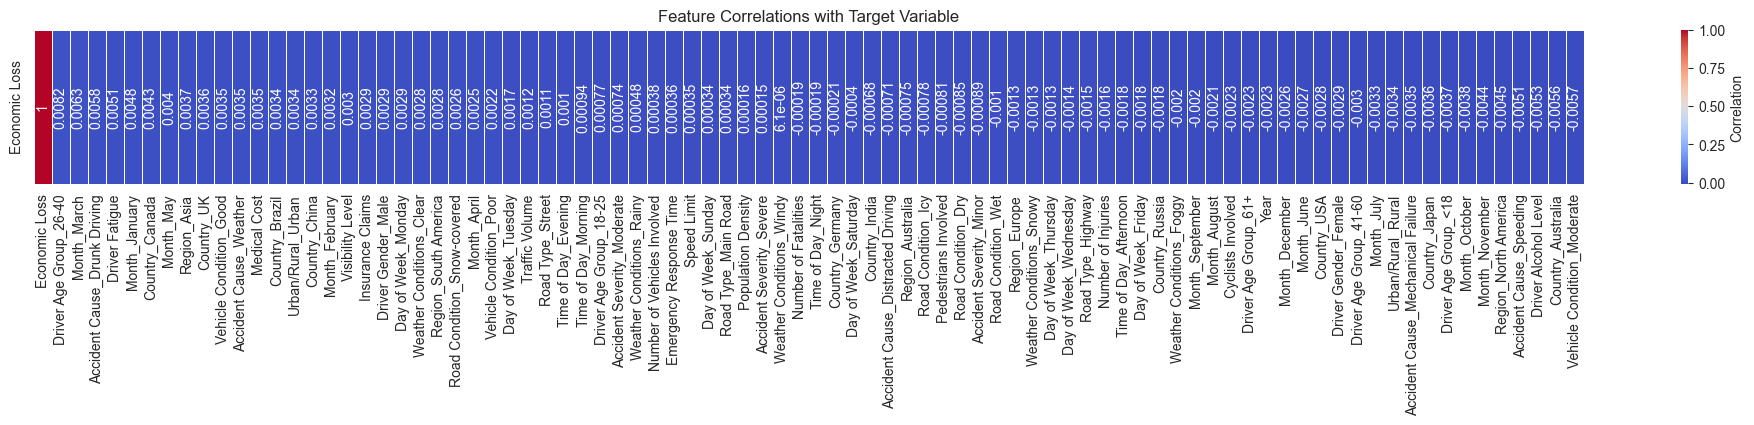

In [20]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Get correlation with target variable (assuming 'Economic Loss' is the target)
correlations = correlation_matrix['Economic Loss'].sort_values(ascending=False)

# Plot heatmap for correlations with target variable (horizontally)
plt.figure(figsize=(25, 2))  # Adjusted the figure size for horizontal display
sns.heatmap(correlations.to_frame().T, annot=True, cmap="coolwarm", linewidths=0.5, 
            cbar_kws={'label': 'Correlation'}, annot_kws={'rotation': 90})
plt.title("Feature Correlations with Target Variable")
plt.show()


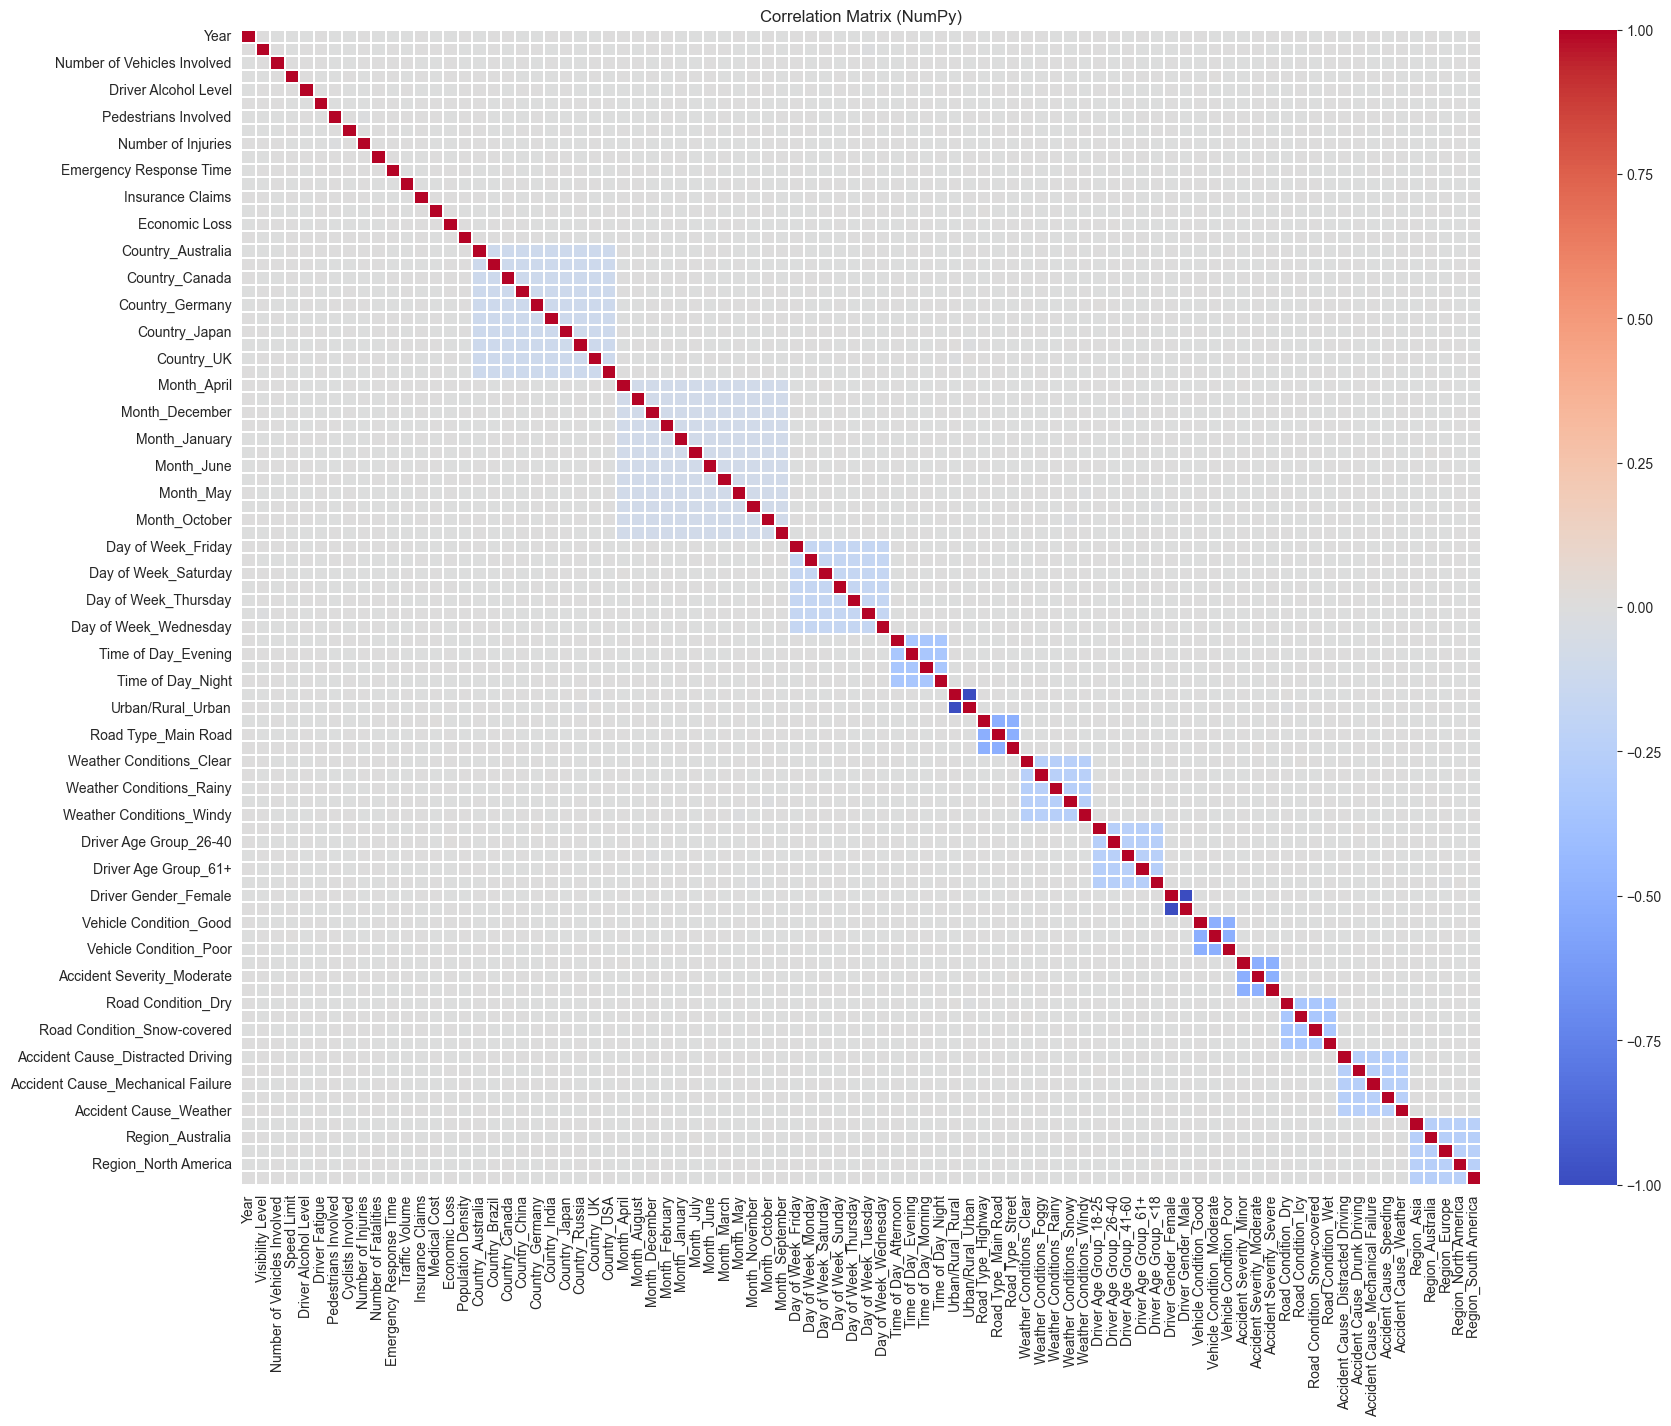

In [21]:

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.1)
plt.title("Correlation Matrix (NumPy)")
plt.show()


In [22]:
##################

In [23]:

# # List of selected features to plot against the target variable ('Economic Loss')
# target_variable = 'Economic Loss'

# # Create scatter plots
# plt.figure(figsize=(12, 4 * len(selected_features)))

# for i, feature in enumerate(selected_features, 1):
#     plt.subplot(len(selected_features), 1, i)
#     sns.scatterplot(x=new_data[feature], y=new_data[target_variable], alpha=0.6)
#     plt.xlabel(feature)
#     plt.ylabel(target_variable)
#     plt.title(f"{feature} vs {target_variable}")

# plt.tight_layout()
# plt.show()


# Select features which effect Economic Loss

In [24]:
# selected_features = [
#     'Year', 'Number of Vehicles Involved', 'Speed Limit', 'Driver Alcohol Level', 'Driver Fatigue', 'Pedestrians Involved', 'Cyclists Involved', 'Number of Injuries',
#     'Number of Fatalities', 'Emergency Response Time', 'Traffic Volume', 'Insurance Claims', 'Medical Cost', 'Population Density', 'Economic Loss'
# ]


# new_data = data[selected_features].copy()

# # new_data = new_data.iloc[:50]

# new_data.head()




#################################################################


top_features = correlations.index[:8]  

print(correlations[top_features])

# Select the top features for training
new_data = data[top_features]

# Display the selected features data
new_data.head()



Economic Loss                   1.000000
Driver Age Group_26-40          0.008214
Month_March                     0.006285
Accident Cause_Drunk Driving    0.005791
Driver Fatigue                  0.005110
Month_January                   0.004801
Country_Canada                  0.004329
Month_May                       0.003975
Name: Economic Loss, dtype: float64


,Economic Loss,Driver Age Group_26-40,Month_March,Accident Cause_Drunk Driving,Driver Fatigue,Month_January,Country_Canada,Month_May
0,22072.878502,False,False,False,0.0,False,False,False
1,9534.399441,False,False,False,1.0,False,False,False
2,58009.145124,False,False,False,0.0,False,False,False
3,20907.151302,False,False,False,1.0,False,False,True
4,13584.060759,False,False,False,1.0,False,True,False


# Define X and y and set Hyper parameters

In [ ]:
# Define features (X) and target variable (y)
X = new_data.drop(columns=['Economic Loss']).values  # Convert to NumPy array
y = new_data['Economic Loss'].values.reshape(-1, 1)  # Convert to NumPy array and reshape

# Add bias term (intercept) to X
X = np.c_[np.ones((X.shape[0], 1)), X]  # Adding a column of ones for the intercept

# Hyperparameters
learning_rate = 0.001  # Step size
epochs = 3000  # Number of iterations
m = X.shape[0]  # Number of samples

# Initialize weights (theta) randomly
theta = np.random.randn(X.shape[1], 1)



array([[1.0, False, False, ..., False, False, False],
       [1.0, False, False, ..., False, False, False],
       [1.0, False, False, ..., False, False, False],
       ...,
       [1.0, True, True, ..., False, False, False],
       [1.0, False, False, ..., False, False, True],
       [1.0, False, False, ..., False, False, False]],
      shape=(132000, 8), dtype=object)

In [21]:
# THE VALUES OF X WITH ONE COL AS BIASS

columns = ['Bias'] + list(new_data.drop(columns=['Economic Loss']).columns)  # Add column names
X_df = pd.DataFrame(X, columns=columns)
pd.set_option("display.float_format", "{:.4f}".format)  # Limit decimal places
print(X_df.head(10))  # Show first 10 rows neatly


  Bias   Driver Age Group_26-40 Month_March Accident Cause_Drunk Driving Driver Fatigue Month_January Country_Canada Month_May
0 1.0000  False                  False       False                       0.0000          False         False          False   
1 1.0000  False                  False       False                       1.0000          False         False          False   
2 1.0000  False                  False       False                       0.0000          False         False          False   
3 1.0000  False                  False       False                       1.0000          False         False           True   
4 1.0000  False                  False       False                       1.0000          False          True          False   
5 1.0000  False                  False       False                       1.0000          False         False           True   
6 1.0000  False                   True       False                       0.0000          False         False   

In [22]:
print(f"theta type: {theta.dtype}")
print(f"gradients type: {gradients.dtype}")


theta type: float64
gradients type: object


# Training

In [23]:


# Store loss for visualization
loss_history = []

# Gradient Descent Loop
for epoch in range(epochs):
    # Compute predictions
    y_pred = np.dot(X, theta)

    # Compute error
    error = y_pred - y

    # Compute gradients
    gradients = (1/m) * np.dot(X.T, error)

    # Update weights
    theta -= learning_rate * gradients.astype(np.float64)

    # Compute and store loss (Mean Squared Error)
    mse = np.mean(error ** 2)
    loss_history.append(mse)

    # Print MSE every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: MSE = {mse}")



Epoch 0: MSE = 3360924653.424941
Epoch 100: MSE = 2755609358.387754
Epoch 200: MSE = 2299842720.3771887
Epoch 300: MSE = 1956487931.2258413
Epoch 400: MSE = 1697636828.6407342
Epoch 500: MSE = 1502316301.472436
Epoch 600: MSE = 1354764730.8385797
Epoch 700: MSE = 1243136793.5755465
Epoch 800: MSE = 1158530165.2512703
Epoch 900: MSE = 1094254119.6425393
Epoch 1000: MSE = 1045279905.1104238
Epoch 1100: MSE = 1007827720.0918443
Epoch 1200: MSE = 979056338.1633544
Epoch 1300: MSE = 956829870.7630928
Epoch 1400: MSE = 939542496.2482951
Epoch 1500: MSE = 925986748.6973817
Epoch 1600: MSE = 915254540.4012544
Epoch 1700: MSE = 906662782.6331954
Epoch 1800: MSE = 899697491.2170402
Epoch 1900: MSE = 893971782.821803
Epoch 2000: MSE = 889194309.695091
Epoch 2100: MSE = 885145538.559082
Epoch 2200: MSE = 881659924.1581378
Epoch 2300: MSE = 878612512.4667898
Epoch 2400: MSE = 875908872.6671511
Epoch 2500: MSE = 873477530.6111877
Epoch 2600: MSE = 871264282.0929377
Epoch 2700: MSE = 869227918.760925

In [24]:
# Final model parameters (theta)
print("Final weights (theta):")
print(theta)

# Making predictions on the same dataset
predictions = np.dot(X, theta)

# Display first 5 predictions
print("First 5 Predictions:")
print(predictions[:5])


Final weights (theta):
[[39090.38743226]
 [ 5741.95058877]
 [ 2981.04355555]
 [ 5682.47211935]
 [11532.84002001]
 [ 2919.54723065]
 [ 3325.24418175]
 [ 2932.73339422]]
First 5 Predictions:
[[39090.38743225597]
 [50623.22745226986]
 [39090.38743225597]
 [53555.9608464865]
 [53948.471634019435]]


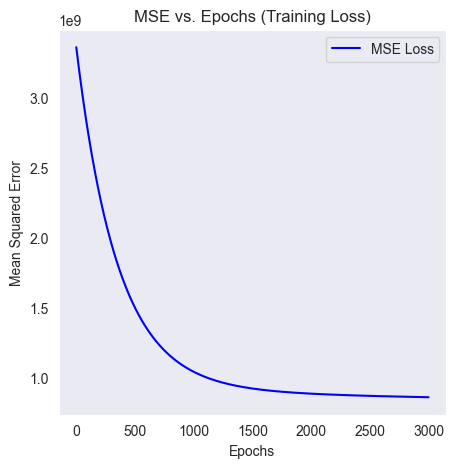

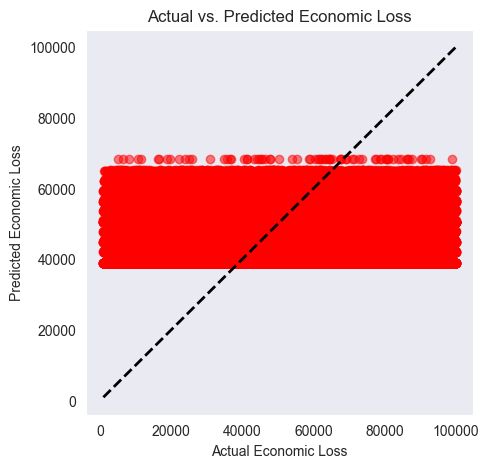

In [25]:

# Plot MSE vs. Epochs
plt.figure(figsize=(5, 5))
plt.plot(range(epochs), loss_history, label="MSE Loss", color='b')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs. Epochs (Training Loss)")
plt.legend()
plt.grid()
plt.show()

# Scatter plot: Actual vs. Predicted Economic Loss
plt.figure(figsize=(5, 5))
plt.scatter(y, predictions, color='r', alpha=0.5)
plt.xlabel("Actual Economic Loss")
plt.ylabel("Predicted Economic Loss")
plt.title("Actual vs. Predicted Economic Loss")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Reference line
plt.grid()
plt.show()


In [ ]:
# def predict_economic_loss(features):
#     """
#     Predict Economic Loss using the trained model.
    
#     :param features: List or NumPy array of feature values (excluding 'Economic Loss')
#     :return: Predicted economic loss value
#     """
#     if len(features) != X.shape[1] - 1:
#         raise ValueError(f"Expected {X.shape[1] - 1} features, but got {len(features)}")

#     features = np.array(features).reshape(1, -1)  # Convert input to NumPy array
#     features = np.c_[np.ones((features.shape[0], 1)), features]  # Add bias term
#     prediction = np.dot(features, theta)  # Compute prediction

#     return prediction[0, 0]

# # Example usage with a random test sample (replace with actual values)
# test_features = [0.098, 0.2, 0.50, 0.1, 0, 0.1, 0, 0.3, 1, 0, 0.5, 0.300, 2, 1, 0.2000, 0.500]  # Example input
# predicted_loss = predict_economic_loss(test_features)
# print(f"Predicted Economic Loss: {predicted_loss:.2f}")


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Example data (replace with your actual data)
# y_actual = np.array(y)  # Actual Economic Loss
# y_predicted = np.array(predictions)  # Predicted Economic Loss

# # Compute Least Squares for Line of Best Fit
# N = len(y_actual)
# sum_x = np.sum(y_actual)
# sum_y = np.sum(y_predicted)
# sum_xy = np.sum(y_actual * y_predicted)
# sum_x2 = np.sum(y_actual ** 2)

# # Compute slope (m) and intercept (b)
# m = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x ** 2)
# b = (sum_y - m * sum_x) / N

# # Generate fitted values for the best-fit line
# y_fit = np.linspace(y_actual.min(), y_actual.max(), 100)
# predicted_fit = m * y_fit + b  # y = mx + b

# # Plot Scatter Plot
# plt.figure(figsize=(15, 5))
# plt.scatter(y_actual, y_predicted, color='r', alpha=0.5, label="Actual vs. Predicted")

# # Plot Line of Best Fit
# plt.plot(y_fit, predicted_fit, 'b-', lw=2, label="Line of Best Fit")

# # Plot Reference Line (y = x)
# plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2, label="Reference Line (y=x)")

# # Labels and title
# plt.xlabel("Actual Economic Loss")
# plt.ylabel("Predicted Economic Loss")
# plt.title("Actual vs. Predicted Economic Loss with Line of Best Fit")
# plt.legend()
# plt.grid()
# plt.show()
